# Machine Learning 

Building a model to predict numbers from handwritten digits using the MNIST dataset

In [27]:
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier


In [2]:
#import data
mnist = fetch_openml("mnist_784", version = 1, cache = True, as_frame = False)
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
# 60 000 training and 10 000 test patterns
# 28 x 28 image field
# 784 features 

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape
X_test.shape, y_test.shape

((14000, 784), (14000,))

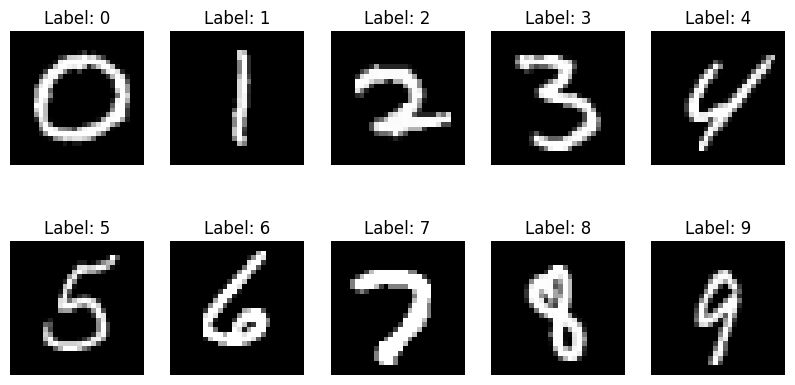

In [24]:
# see sample images from the data set for each digit (0-9)
unique_labels = np.arange(10) 
ind = [np.where(y_train == label)[0][0] for label in unique_labels]  # first occurrence of each digit

plt.figure(figsize=(10, 5))
for i, idx in enumerate(ind):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[idx].reshape(28, 28), cmap="gray")  
    plt.title(f"Label: {y_train[idx]}")
    plt.axis("off")  

plt.show()

In [6]:
# check class distribution, see if all numbers are equally represented
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{np.uint8(0): np.int64(5560), np.uint8(1): np.int64(6277), np.uint8(2): np.int64(5610), np.uint8(3): np.int64(5708), np.uint8(4): np.int64(5529), np.uint8(5): np.int64(5040), np.uint8(6): np.int64(5480), np.uint8(7): np.int64(5790), np.uint8(8): np.int64(5468), np.uint8(9): np.int64(5538)}


In [ ]:
# defining the models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier()

# defining the parameter distributions for RandomForest
rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
}

# defining the parameter distributions for XGBoost
xgb_param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Train and Tune the two Models

In [ ]:
# using RandomizedSearchCV to give the best set of hyperparameters 
rf_random_search = RandomizedSearchCV(rf, rf_param_dist, n_iter=9, cv=5, random_state=42)
xgb_random_search = RandomizedSearchCV(xgb, xgb_param_dist, n_iter=9, cv=5, random_state=42)

# fit the RandomizedSearchCV
rf_random_search.fit(X_train, y_train)
xgb_random_search.fit(X_train, y_train)

# print the best parameters for each model
print("Best parameters for RandomForest:", rf_random_search.best_params_)
print("Best parameters for XGBoost:", xgb_random_search.best_params_)

Best parameters for RandomForest: {'n_estimators': 300, 'max_depth': 30}
Best parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [ ]:
# train Random Forest with the best parameters
rf_best = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)
rf_best.fit(X_train, y_train)
print("Random Forest training complete!")

# train XGBoost with the best parameters
xgb_best = XGBClassifier(subsample=0.8, n_estimators=100, max_depth=6, learning_rate=0.1, colsample_bytree=0.8, random_state=42)
xgb_best.fit(X_train, y_train)
print("XGB training complete!")

Random Forest training complete!
XGB training complete!


# Evaluating of the Models

In [11]:
# make predictions
rf_preds = rf_best.predict(X_test)
xgb_preds = xgb_best.predict(X_test)

# evaluate Random Forest
print("Random Forest Performance:")
print(classification_report (y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

# evaluate XGBoost
print("\n XGBoost Performance:")
print(classification_report(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.96      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Accuracy: 0.9681428571428572

 XGBoost Performance:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.98      0.98      0.98      1600

## Model Desicion

After evaluating the performance of both the Random Forest and XGBoost models, I found that they both achieve similar accuracy scores. However, based on additional considerations, I have decided to move forward with the Random Forest model. The key factors in this decision are:

1. Storage Efficiency
2. Faster Execution
3. Simpler Workflow

While both models perform well, the Random Forest model provides a good balance of performance and efficiency.

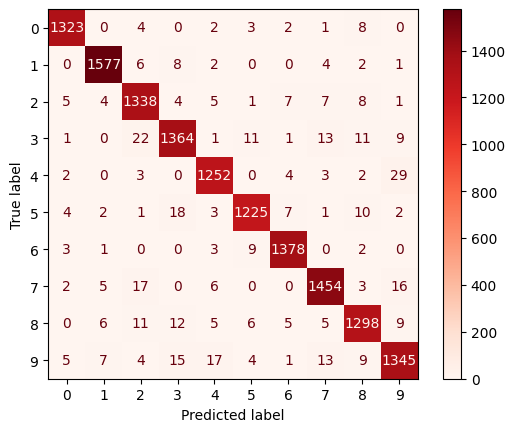

In [18]:
rf_preds = rf_best.predict(X_test)
cm = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
disp.plot(cmap=plt.cm.Reds)

plt.show()

# Final Model

Train the final model on the entire dataset (train + test) to make the most out of all available data before deployment.

In [29]:
rf_final = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)
X_combined = np.concatenate((X_train, X_test), axis=0) 
y_combined = np.concatenate((y_train, y_test), axis=0)
rf_final.fit(X_combined, y_combined)
print("Final training complete!")

Final training complete!


In [30]:
#save final model for deployment
joblib.dump(rf_final, 'random_forest_final_model.joblib')

['random_forest_final_model.joblib']